In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [15]:
df = pd.read_excel("loan.xlsx")

In [16]:
df.to_csv("loan.xlsx", sep=",")

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

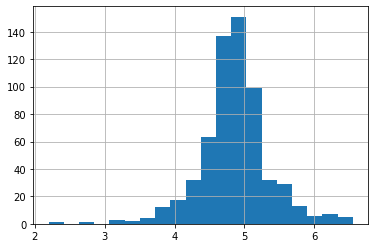

In [25]:
df['loanamount_log'] = np.log(df['LoanAmount'])
df['loanamount_log'].hist(bins=20)

<AxesSubplot:>

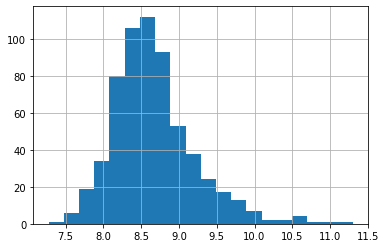

In [20]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins =20)

In [27]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanamount_log = df.LoanAmount.fillna(df.loanamount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
logamount_log        22
loanamount_log        0
dtype: int64

In [36]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'No', 0.0, ..., 1.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', 1.0, ..., 1.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', 0.0, ..., 1.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', 1.0, ..., 1.0, 8312.0, 9.025455532779063],
       ['Male', 'Yes', 2.0, ..., 1.0, 7583.0, 8.933664178700935],
       ['Female', 'No', 0.0, ..., 0.0, 4583.0, 8.430109084509125]],
      dtype=object)

Grouping the people based on gender who take loan: 
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

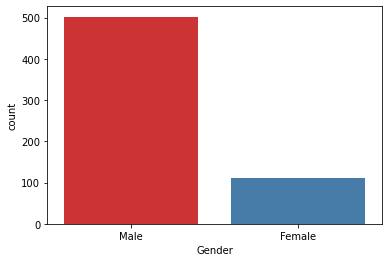

In [28]:
print("Grouping the people based on gender who take loan: ")
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender',data = df,palette = 'Set1')

Grouping the people based on marital status who take loan: 
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

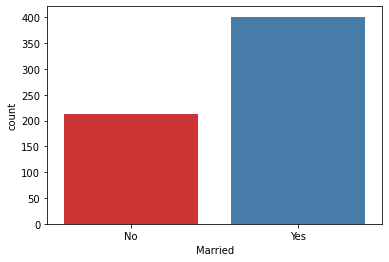

In [29]:
print("Grouping the people based on marital status who take loan: ")
print(df['Married'].value_counts())
sns.countplot(x = 'Married',data = df,palette = 'Set1')

Grouping the people based on dependents who take loan: 
0.0    360
1.0    102
2.0    101
3+      51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

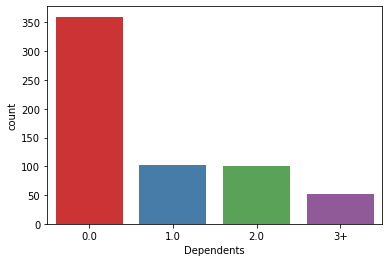

In [31]:
print("Grouping the people based on dependents who take loan: ")
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents',data = df,palette = 'Set1')

Grouping the people based on self employed who take loan: 
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

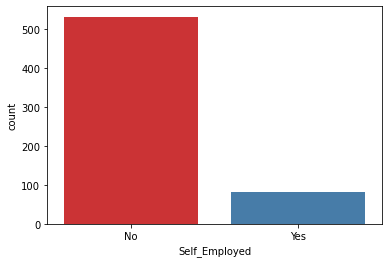

In [32]:
print("Grouping the people based on self employed who take loan: ")
print(df['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed',data = df,palette = 'Set1')

Grouping the people based on Loan Amount who take loan: 
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

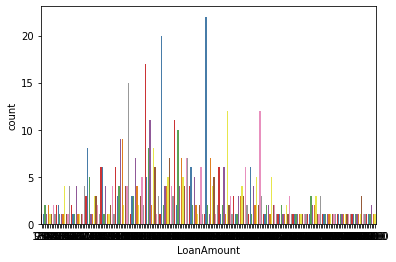

In [34]:
print("Grouping the people based on Loan Amount who take loan: ")
print(df['LoanAmount'].value_counts())
sns.countplot(x = 'LoanAmount',data = df,palette = 'Set1')

Grouping the people based on Credit history who take loan: 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

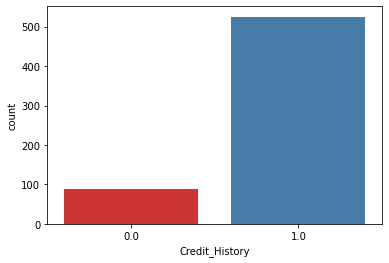

In [35]:
print("Grouping the people based on Credit history who take loan: ")
print(df['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History',data = df,palette = 'Set1')

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [54]:
for i in range(0,5):
    ##X_train[:,i] = X_train[:,i].astype(str)
    X_train[:,i] = labelencoder_x.fit_transform(X_train[:,i])
    X_train[:,7] = labelencoder_x.fit_transform(X_train[:,7])
    
X_train

array([[1, 1, 0, ..., 1.0, 5858.0, 331],
       [1, 0, 1, ..., 1.0, 11250.0, 8],
       [1, 1, 0, ..., 0.0, 5681.0, 303],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 312],
       [1, 1, 0, ..., 1.0, 6033.0, 387],
       [0, 1, 0, ..., 1.0, 6486.0, 338]], dtype=object)

In [55]:
labelencoder_y = LabelEncoder()
Y_train = labelencoder_y.fit_transform(Y_train)

Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [139]:
for i in range(0,5):
    X_test[:,i] = X_test[:,i].astype(str)
    X_test[:,i] = labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7] = labelencoder_x.fit_transform(X_test[:,7])
    
X_test

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
         1.34657546e-01,  8.50000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
        -5.77249733e-01,  2.80000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
         8.71250927e-01,  1.04000000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
         5.96018225e-02,  8.00000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
        -6.65770603e-01,  2.20000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.00000000e+00, -2.58602011e+00,
        -1.21429591e-01,  7.00000000e+01],
       [ 1.00000000e+00,  1.000000

In [63]:
Labelencoder_y = LabelEncoder()

Y_test = Labelencoder_y.fit_transform(Y_test)
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [141]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [144]:
from sklearn import metrics
y_pred = rf.predict(X_test)

print("Accuracy of random forest classifier is ",metrics.accuracy_score(y_pred,Y_test))

##y_pred

Accuracy of random forest classifier is  0.7073170731707317


In [146]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [147]:
y_pred = nb.predict(X_test)
print("Accuracy of Navie Bayes classifier is ",metrics.accuracy_score(y_pred,Y_test))

Accuracy of Navie Bayes classifier is  0.8373983739837398


In [148]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [150]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [151]:
y_pred = dt.predict(X_test)
print("Accuracy of Decision Tree classifier is ",metrics.accuracy_score(y_pred,Y_test))

Accuracy of Decision Tree classifier is  0.6747967479674797


In [152]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [156]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,Y_train)

KNeighborsClassifier()

In [157]:
y_pred = kn.predict(X_test)
print("Accuracy of KNeighbors classifier is ",metrics.accuracy_score(y_pred,Y_test))

Accuracy of KNeighbors classifier is  0.7967479674796748
